In [250]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


from train_test_split import train_test_split
from supervised_metrics import accuracy, precision, recall, f1_score
from logi import Logistic_Regression
from kmeans import KMeans

In [251]:
#command to download the datasets
#import kaggle

#kaggle.api.authenticate()


#kaggle.api.dataset_download_files('johnsmith88/heart-disease-dataset', path='data', unzip=True)

#kaggle.api.dataset_download_files('rohan0301/unsupervised-learning-on-country-data', path='data', unzip=True)


In [252]:
heart_disease = pd.read_csv('heart.csv')
country_data = pd.read_csv('country-data.csv')

In [253]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [254]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Exploratory Data Analysis (EDA)

### Heart Disease Dataset

In [255]:
#  Heart Disease - Dataset Shape
print("Shape:", heart_disease.shape)

Shape: (1025, 14)


In [256]:
# Heart Disease - Data Types
print(heart_disease.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [257]:
# Heart Disease - Missing Values
missing = heart_disease.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found")

No missing values found


In [258]:
# Heart Disease - Basic Statistics
print(heart_disease.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [259]:
# checking for duplicate rows in heart disease dataset
print("Number of duplicate rows:", heart_disease.duplicated().sum())

Number of duplicate rows: 723


In [260]:
print( heart_disease[heart_disease.duplicated()])

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0     2       1  
31        2

In [261]:
heart_disease = heart_disease.drop_duplicates()

### Country Data Dataset

In [262]:
# Block 2a: Country Data - Dataset Shape
print("Shape:", country_data.shape)

Shape: (167, 10)


In [263]:
# Country Data - Data Types
print(country_data.dtypes)

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


In [264]:
# Country Data - Missing Values
missing = country_data.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found")

No missing values found


In [265]:
#  Country Data - Basic Statistics
print(country_data.describe())

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

In [266]:
# checking for duplicate rows in country data dataset
print("Number of duplicate rows:", country_data.duplicated().sum())

Number of duplicate rows: 0


### Plots

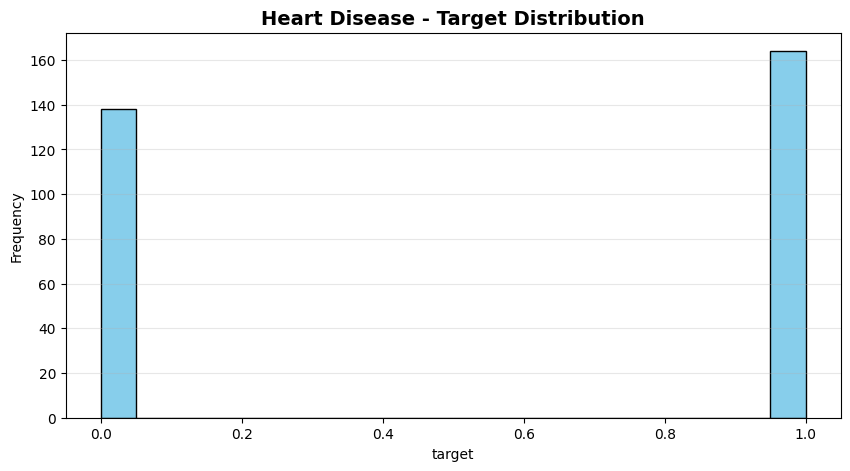

In [267]:
# Heart Disease - Target Distribution
target_col = heart_disease.columns[-1]
plt.figure(figsize=(10, 5))
plt.hist(heart_disease[target_col], bins=20, color='skyblue', edgecolor='black')
plt.title('Heart Disease - Target Distribution', fontsize=14, fontweight='bold')
plt.xlabel(target_col)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()

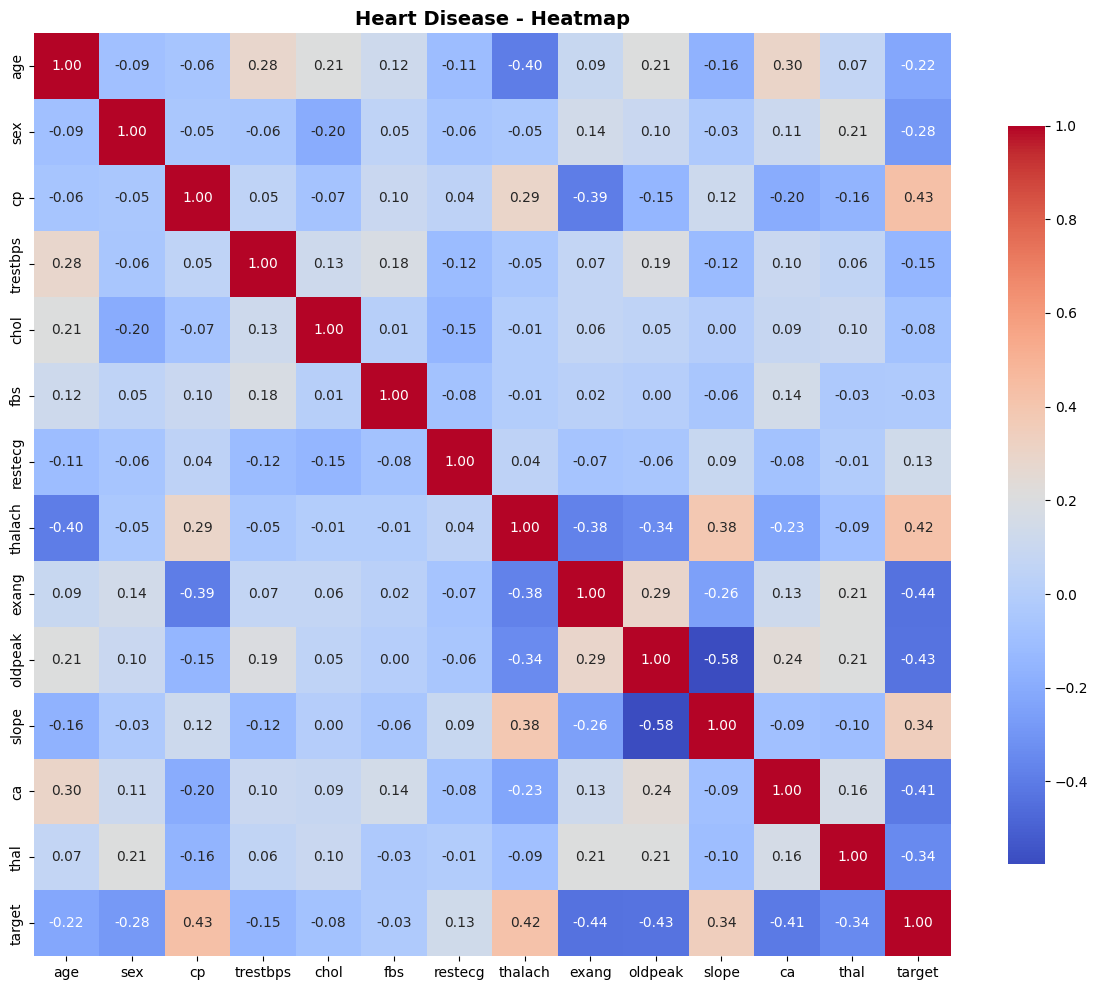

In [268]:
# Heart Disease - Correlation Heatmap
correlation_matrix = heart_disease.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'shrink': 0.8})
plt.title('Heart Disease - Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\pranj\AppData\Local\Temp\ipykernel_24280\3663416648.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([heart_disease[col] for col in numeric_cols], labels=numeric_cols)


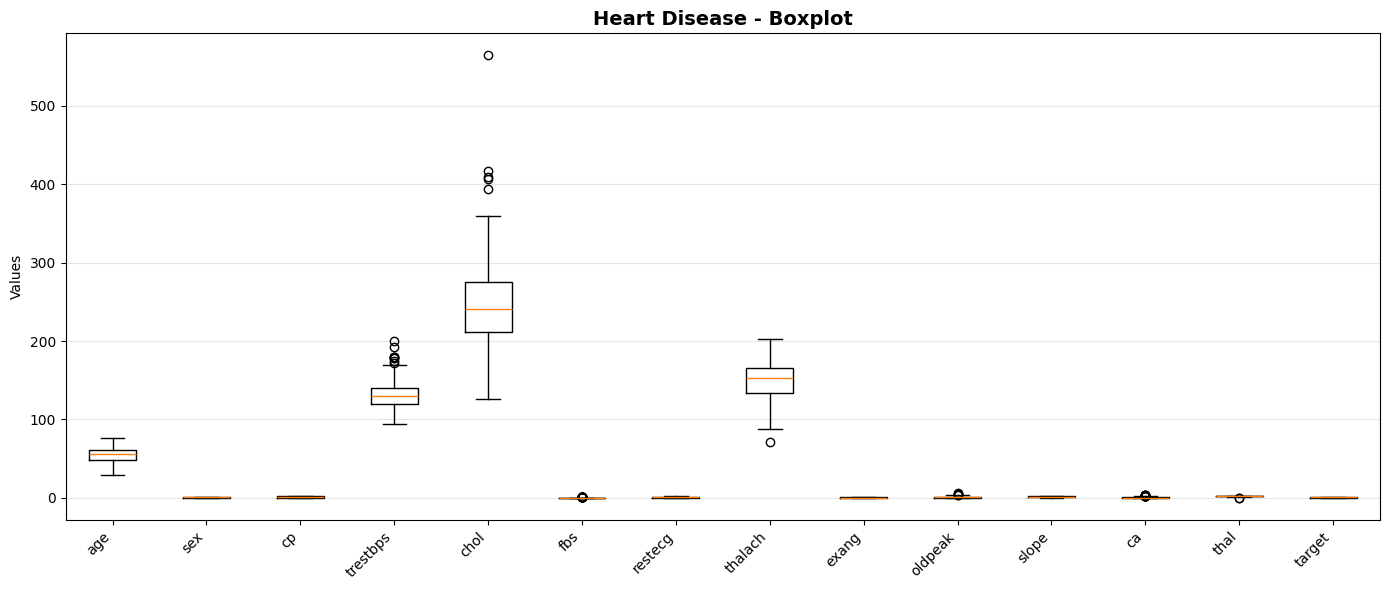

In [269]:
# Heart Disease - Outlier Detection 
numeric_cols = heart_disease.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(14, 6))
plt.boxplot([heart_disease[col] for col in numeric_cols], labels=numeric_cols)
plt.title('Heart Disease - Boxplot', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Values')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

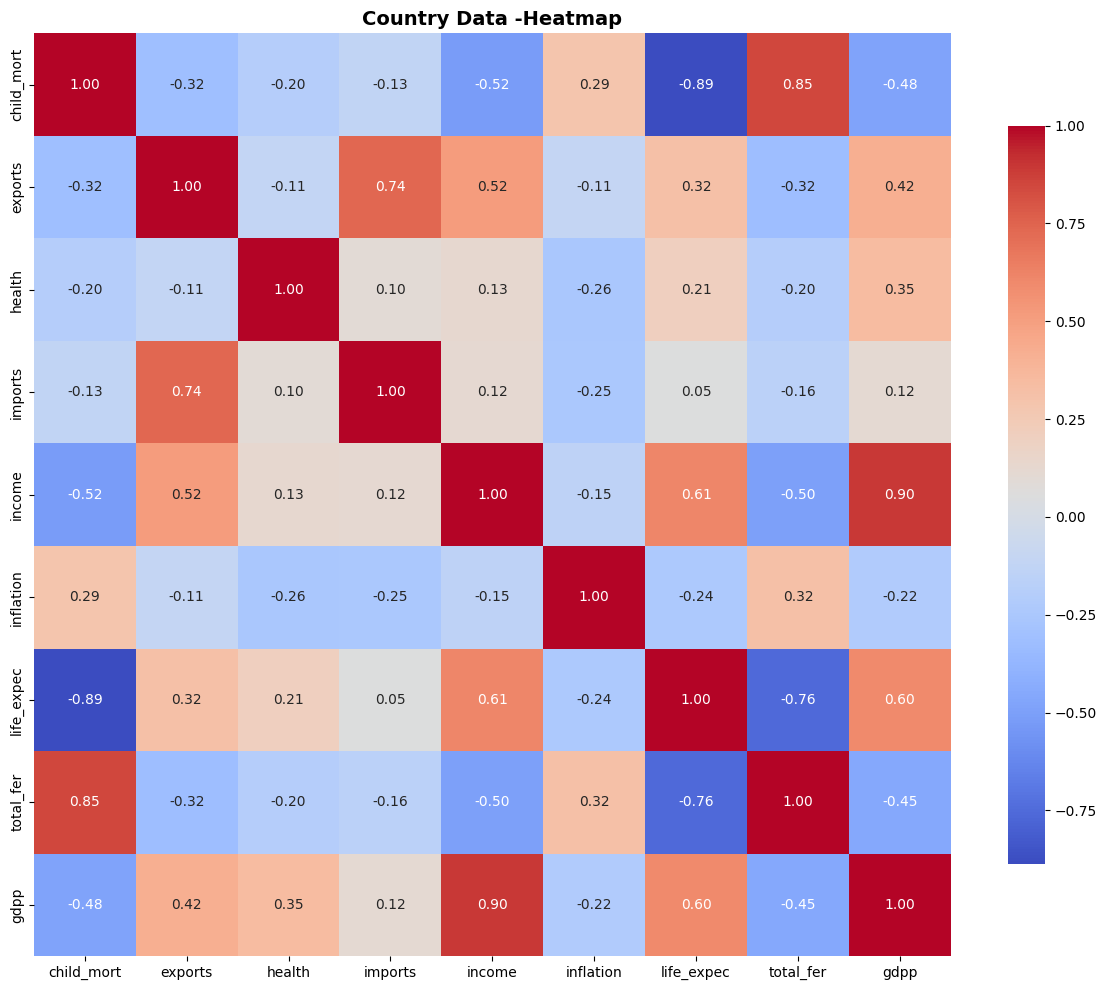

In [270]:
# Country Data - Correlation Heatmap
correlation_matrix_country = country_data.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_country, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'shrink': 0.8})
plt.title('Country Data -Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\pranj\AppData\Local\Temp\ipykernel_24280\2391797855.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([country_data[col] for col in numeric_cols], labels=numeric_cols)


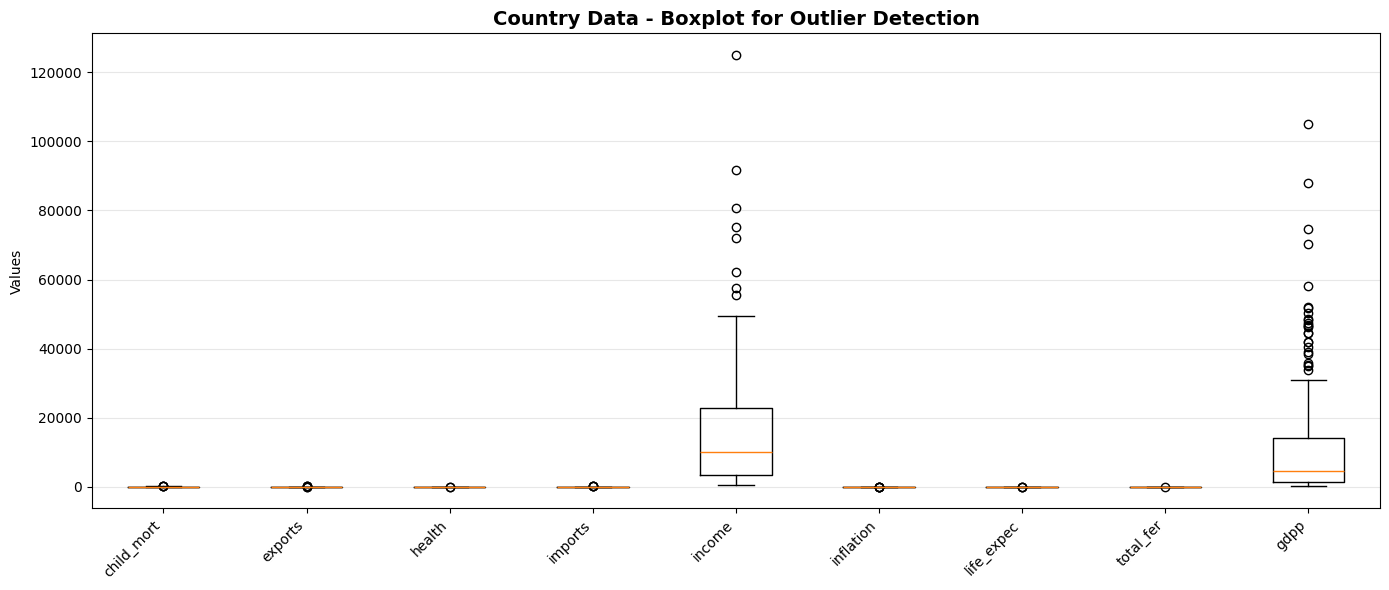

In [271]:
# Country Data - Outlier Detection
numeric_cols = country_data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(14, 6))
plt.boxplot([country_data[col] for col in numeric_cols], labels=numeric_cols)
plt.title('Country Data - Boxplot for Outlier Detection', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Values')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Numeric features: Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


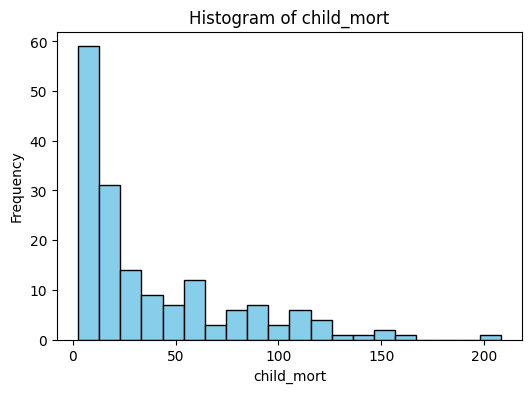

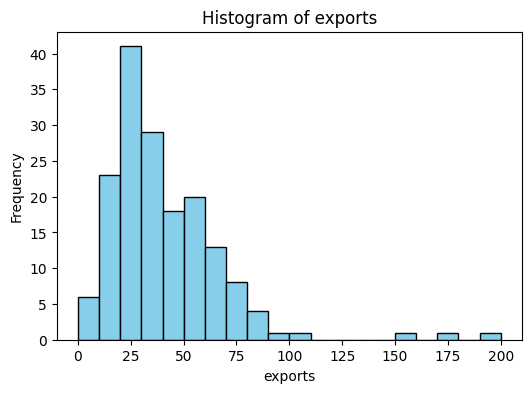

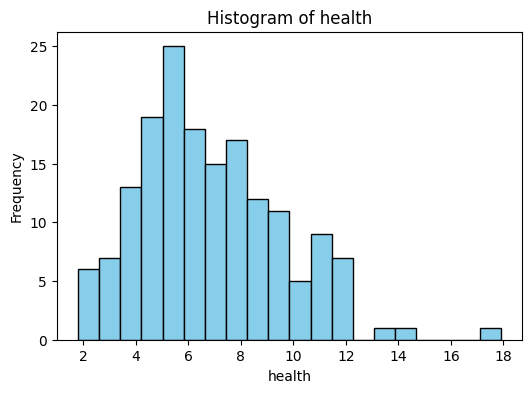

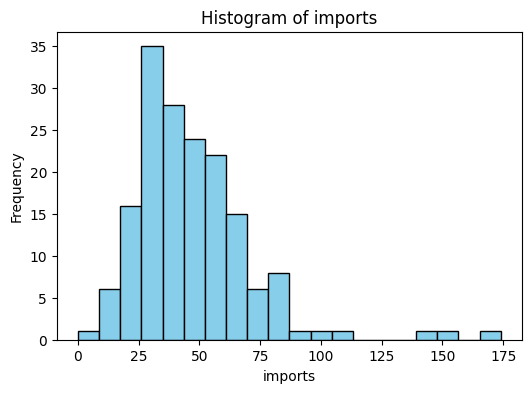

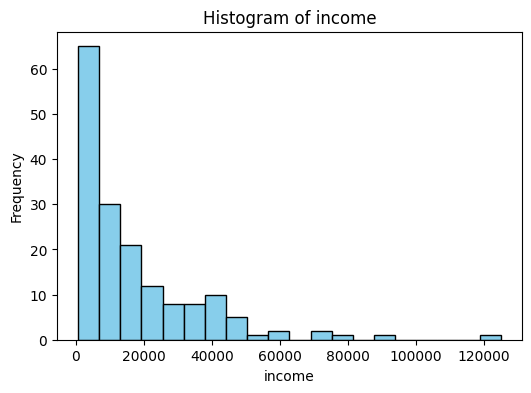

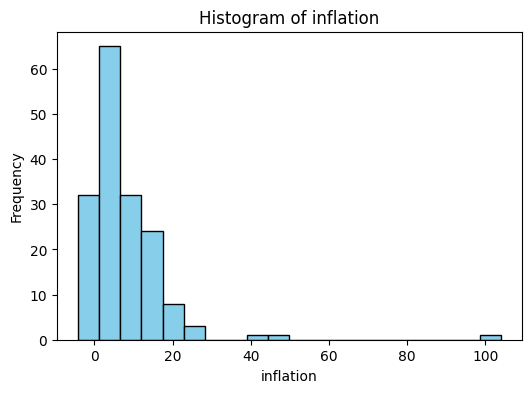

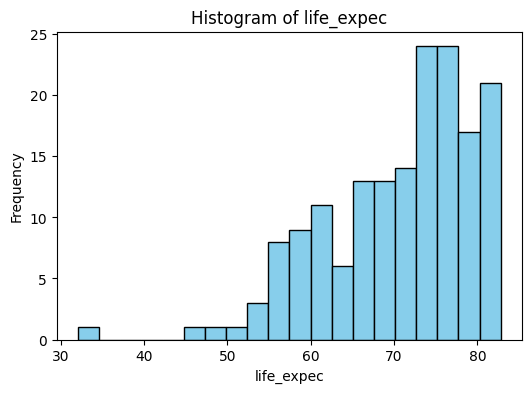

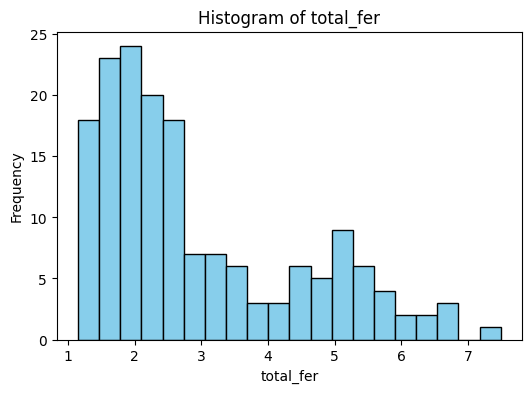

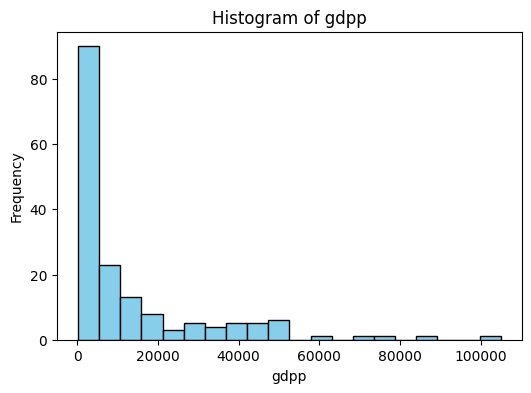

In [272]:
print("Numeric features:", numeric_cols)
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(country_data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


### Preprocessing

since the dataset are already clean we will be moving onto feature engineering

In [274]:
# High colestrol groups
heart_disease['high_chol'] = (heart_disease['chol'] >= 240).astype(int)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,high_chol
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1


In [275]:
# High blood pressure groups
heart_disease['high_bp'] = (heart_disease['trestbps'] >= 140).astype(int)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,high_chol,high_bp
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1,0


In [276]:
print(heart_disease['oldpeak'].max())
print(heart_disease['oldpeak'].min())
print(heart_disease['oldpeak'].mean())

6.2
0.0
1.0430463576158941


In [277]:
# checking for exercise stress test results
heart_disease['exercise_stress'] = (
    (heart_disease['exang'] == 1) & (heart_disease['oldpeak'] > 1.0)
).astype(int)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,high_chol,high_bp,exercise_stress
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0,0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0,1,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0,1,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0,1,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1,0,0


In [278]:
# Scaling the data

x=heart_disease.drop(columns=['target'])
y=heart_disease['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(heart_disease.shape)
print(X_train_scaled.shape)
print(X_test_scaled.shape)


(302, 17)
(242, 16)
(60, 16)


In [279]:
# Health score of countries

country_data = country_data.set_index('country')

country_data1 = pd.DataFrame(index=country_data.index)

country_data1['health_score'] = (
    (1 / (country_data['child_mort'] / country_data['child_mort'].mean())) +
    (country_data['health'] / country_data['health'].mean()) +
    ((country_data['total_fer'] / country_data['total_fer'].mean()))
)

country_data1.head()


,health_score
country,
Afghanistan,3.510664
Albania,3.826152
Algeria,2.993995
Angola,2.829328
Antigua and Barbuda,5.322796


In [280]:
# Finiance score of countries
country_data1['finance_score'] = (
    (country_data['income'] / country_data['income'].mean()) +
    (country_data['inflation'] / country_data['inflation'].mean()) +
    (country_data['gdpp'] / country_data['gdpp'].mean())
)
country_data1.head()

,health_score,finance_score
country,,
Afghanistan,3.510664,1.349645
Albania,3.826152,1.471658
Algeria,2.993995,3.165367
Angola,2.829328,3.494919
Antigua and Barbuda,5.322796,2.240150


In [281]:
# Trade score of countries
country_data1['trade_score'] = (
    (country_data['imports'] / country_data['imports'].mean()) +
    (country_data['exports'] / country_data['exports'].mean())
)
country_data1.head()

,health_score,finance_score,trade_score
country,,,
Afghanistan,3.510664,1.349645,1.200812
Albania,3.826152,1.471658,1.717580
Algeria,2.993995,3.165367,1.603752
Angola,2.829328,3.494919,2.430387
Antigua and Barbuda,5.322796,2.240150,2.362940


In [282]:
country_data1.describe()

,health_score,finance_score,trade_score
count,167.000000,167.000000,167.000000
mean,5.321322,3.000000,2.000000
std,3.443123,2.579372,1.104055
min,1.700808,0.259853,0.004057
25%,3.055157,1.331001,1.289485
50%,3.826152,2.102993,1.783360
75%,6.211105,3.780678,2.443429
max,16.844703,13.913036,8.575913


In [283]:
# Scaling the features
scaled_data = scaler.fit_transform(country_data1)

### Model Training

In [284]:
# Traing the self made logistic regression model
model2 = Logistic_Regression()
model2.fit(X_train_scaled, y_train)

In [285]:
y_train_pred = model2.predict(X_train_scaled)
y_test_pred = model2.predict(X_test_scaled)

In [286]:
#training set metrics
train_accuracy = accuracy(y_train, y_train_pred)
print("Training Set Accuracy:", train_accuracy)
train_precision = precision(y_train, y_train_pred)
print("Training Set Precision:", train_precision)
train_recall = recall(y_train, y_train_pred)
print("Training Set Recall:", train_recall)
train_f1 = f1_score(y_train, y_train_pred)
print("Training Set F1 Score:", train_f1)

Training Set Accuracy: 0.859504132231405
Training Set Precision: 0.8445945945945946
Training Set Recall: 0.9191176470588235
Training Set F1 Score: 0.880281690140845


In [287]:
#testing set metrics
test_accuracy = accuracy(y_test, y_test_pred)
print("Testing Set Accuracy:", test_accuracy)
test_precision = precision(y_test, y_test_pred)
print("Testing Set Precision:", test_precision)
test_recall = recall(y_test, y_test_pred)
print("Testing Set Recall:", test_recall)
test_f1 = f1_score(y_test, y_test_pred)
print("Testing Set F1 Score:", test_f1)

Testing Set Accuracy: 0.8
Testing Set Precision: 0.7222222222222222
Testing Set Recall: 0.9285714285714286
Testing Set F1 Score: 0.8125000000000001


In [288]:
# Feature importance
feature_importance = pd.Series(
    model2.weights,
    index=X_train.columns,
).sort_values(key=abs, ascending=False)
print(feature_importance.head())

cp         0.655754
sex       -0.549435
ca        -0.498051
oldpeak   -0.439389
thalach    0.370033
dtype: float64


In [289]:
# Traing the scikit-learn logistic regression model
model_sk = LogisticRegression()
model_sk.fit(X_train_scaled, y_train)
y_train_pred_sk = model_sk.predict(X_train_scaled)
y_test_pred_sk = model_sk.predict(X_test_scaled)

In [290]:
# training set metrics for sklearn model
train_accuracy_sk = accuracy(y_train, y_train_pred_sk)
print("Sklearn Model - Training Set Accuracy:", train_accuracy_sk)
train_precision_sk = precision(y_train, y_train_pred_sk)
print("Sklearn Model - Training Set Precision:", train_precision_sk)
train_recall_sk = recall(y_train, y_train_pred_sk)
print("Sklearn Model - Training Set Recall:", train_recall_sk)
train_f1_sk = f1_score(y_train, y_train_pred_sk)
print("Sklearn Model - Training Set F1 Score:", train_f1_sk)

Sklearn Model - Training Set Accuracy: 0.8677685950413223
Sklearn Model - Training Set Precision: 0.8611111111111112
Sklearn Model - Training Set Recall: 0.9117647058823529
Sklearn Model - Training Set F1 Score: 0.8857142857142858


In [291]:
# testing set metrics for sklearn model
test_accuracy_sk = accuracy(y_test, y_test_pred_sk)
print("Sklearn Model - Testing Set Accuracy:", test_accuracy_sk)
test_precision_sk = precision(y_test, y_test_pred_sk)
print("Sklearn Model - Testing Set Precision:", test_precision_sk)
test_recall_sk = recall(y_test, y_test_pred_sk)
print("Sklearn Model - Testing Set Recall:", test_recall_sk)
test_f1_sk = f1_score(y_test, y_test_pred_sk)
print("Sklearn Model - Testing Set F1 Score:", test_f1_sk)

Sklearn Model - Testing Set Accuracy: 0.7833333333333333
Sklearn Model - Testing Set Precision: 0.7272727272727273
Sklearn Model - Testing Set Recall: 0.8571428571428571
Sklearn Model - Testing Set F1 Score: 0.7868852459016394


In [292]:
# Feature importance of sklearn model
feature_importance_sk = pd.Series(
    model_sk.coef_[0],
    index=X_train.columns,
).sort_values(key=abs, ascending=False)
print(feature_importance_sk.head())

cp         1.025840
sex       -0.869068
oldpeak   -0.683856
ca        -0.616982
restecg    0.507595
dtype: float64


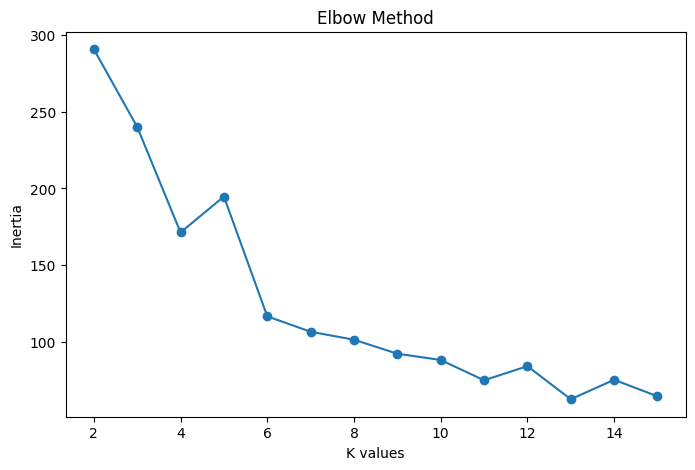

In [293]:
# Elbow Method to find optimal K
inertia_values = []

for k in range(2, 16):
    model = KMeans(K=k, MAX_ITER=100)
    model.predict(scaled_data)
    inertia_values.append(model.inertia())

plt.figure(figsize=(8,5))
plt.plot(range(2,16), inertia_values, marker='o')
plt.xlabel("K values")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


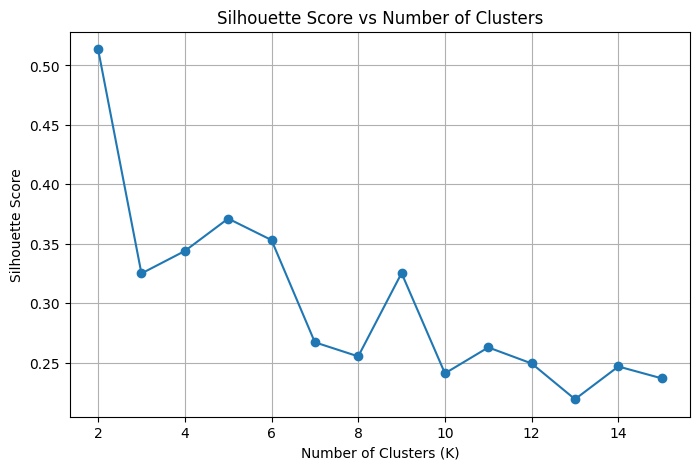

In [294]:
# Silhouette Score to find optimal K
silhouette_scores = []
K_range = range(2, 16)

for k in K_range:
    model = KMeans(K=k, MAX_ITER=100)
    labels = model.predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()


In [295]:
model1 = KMeans(K=6, MAX_ITER=100)
y_pred = model1.predict(scaled_data)
print(y_pred)

[2. 2. 5. 4. 4. 5. 2. 3. 3. 5. 4. 4. 2. 4. 4. 3. 0. 2. 0. 2. 4. 4. 5. 1.
 4. 2. 5. 0. 2. 3. 2. 2. 2. 4. 5. 5. 2. 4. 0. 4. 2. 4. 3. 3. 3. 2. 2. 5.
 2. 1. 5. 3. 0. 3. 3. 5. 2. 4. 3. 2. 3. 2. 2. 2. 2. 0. 2. 0. 3. 2. 5. 5.
 5. 3. 3. 3. 2. 3. 0. 5. 2. 2. 1. 0. 2. 4. 4. 0. 0. 4. 4. 3. 4. 2. 2. 0.
 0. 2. 0. 0. 0. 4. 0. 1. 4. 2. 2. 5. 0. 5. 3. 3. 2. 1. 3. 1. 5. 0. 0. 5.
 2. 4. 3. 1. 4. 5. 2. 2. 1. 2. 4. 0. 5. 3. 0. 3. 0. 5. 3. 3. 5. 2. 5. 4.
 3. 3. 2. 2. 0. 5. 2. 2. 4. 5. 0. 5. 4. 1. 3. 1. 5. 5. 2. 1. 0. 5. 2.]


In [296]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)

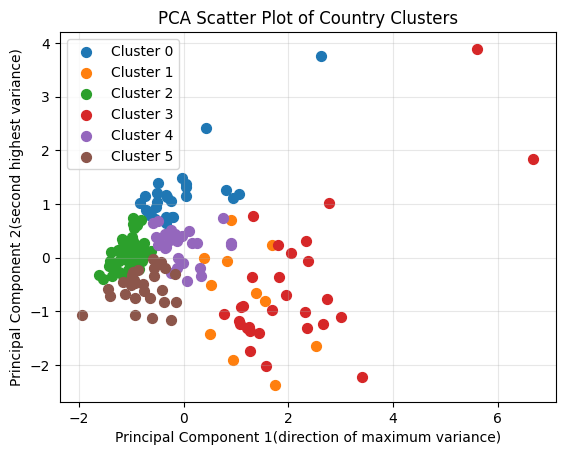

In [297]:
for k in range(6):
    plt.scatter(
        X_pca[y_pred == k, 0],
        X_pca[y_pred == k, 1],
        label=f"Cluster {k}",
        s=50
    )

plt.xlabel("Principal Component 1(direction of maximum variance)")
plt.ylabel("Principal Component 2(second highest variance)")
plt.title("PCA Scatter Plot of Country Clusters")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

<Axes: >

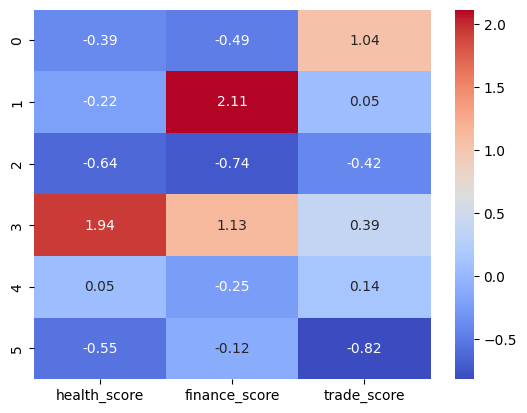

In [298]:
params=pd.DataFrame(model1.centroids, columns=country_data1.columns)
sns.heatmap(params, annot=True, fmt=".2f", cmap="coolwarm")

In [299]:
pd.Series(y_pred).value_counts()

2.0    45
5.0    29
3.0    29
4.0    27
0.0    26
1.0    11
Name: count, dtype: int64

In [300]:
country_data1[y_pred==2].head()

,health_score,finance_score,trade_score
country,,,
Afghanistan,3.510664,1.349645,1.200812
Albania,3.826152,1.471658,1.717580
Armenia,3.333214,1.637648,1.472059
Bangladesh,2.081529,1.118309,0.854125
Benin,2.764533,0.278351,1.372291


The countries with the lowest scores belong to cluster 2